In [6]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC, LinearSVC

# 加载数据集
iris = datasets.load_iris()
X = iris.data
y = iris.target

# 创建LinearSVC模型并使用交叉验证评估性能
clf_linear = LinearSVC(max_iter=5000)
scores_linear = cross_val_score(clf_linear, X, y, cv=5)
print("LinearSVC模型的交叉验证准确率为：", scores_linear.mean())

# 创建SVC模型并使用交叉验证评估性能
clf = SVC()
scores = cross_val_score(clf, X, y, cv=5)
print("SVC模型的交叉验证准确率为：", scores.mean())


LinearSVC模型的交叉验证准确率为： 0.9666666666666668
SVC模型的交叉验证准确率为： 0.9666666666666666


In [13]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score

# 加载数据集
iris = datasets.load_iris()
X = iris.data
y = iris.target

# 将数据集分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 使用LinearSVC模型拟合训练集并预测测试集
clf_linear = LinearSVC(max_iter=5000)
clf_linear.fit(X_train, y_train)
y_pred_linear = clf_linear.predict(X_test)

# 使用SVC模型拟合训练集并预测测试集
clf = SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# 计算LinearSVC模型的准确率
acc_linear = accuracy_score(y_test, y_pred_linear)
print("LinearSVC模型的准确率为：", acc_linear)

# 计算SVC模型的准确率
acc = accuracy_score(y_test, y_pred)
print("SVC模型的准确率为：", acc)


LinearSVC模型的准确率为： 1.0
SVC模型的准确率为： 1.0


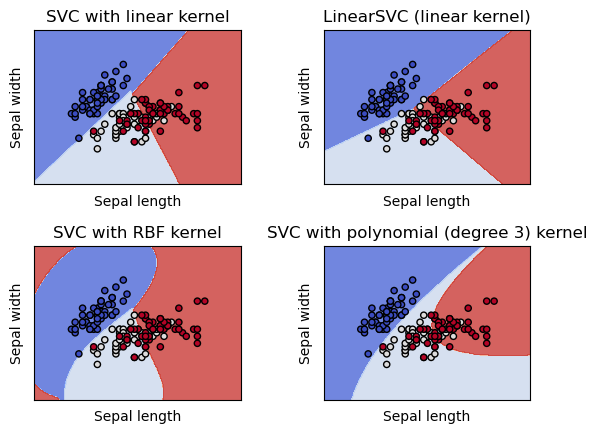

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C, max_iter=10000),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()


In [25]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# 加载红酒数据集
wine = load_wine()
X = wine.data
y = wine.target

# 数据预处理，标准化数据
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 将数据集分为训练集和测试集
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.35, random_state=0)

# 构建LinearSVC模型并训练
clf_linear = LinearSVC(max_iter=10000)
clf_linear.fit(Xtrain, Ytrain)

# 构建SVC模型并训练
clf = SVC()
clf.fit(Xtrain, Ytrain)

# 在测试集上进行预测并计算准确率
Ylinear_pred = clf_linear.predict(Xtest)
accuracy_linear = accuracy_score(Ytest, Ylinear_pred)
print("LinearSVC模型的准确率为：", accuracy_linear)

Ypred = clf.predict(Xtest)
accuracy = accuracy_score(Ytest, Ypred)
print("SVC模型的准确率为：", accuracy)


LinearSVC模型的准确率为： 0.9841269841269841
SVC模型的准确率为： 0.9841269841269841


交叉验证准确率： 0.9720634920634922


/Users/shenmingjie/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


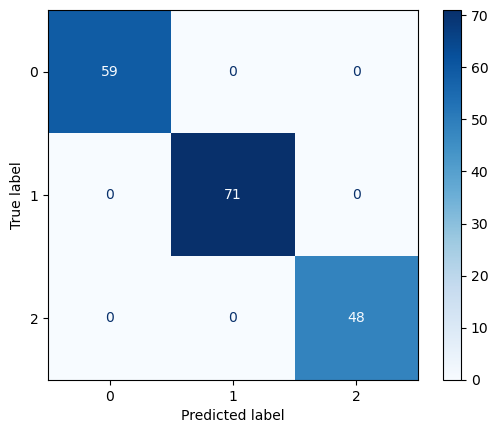

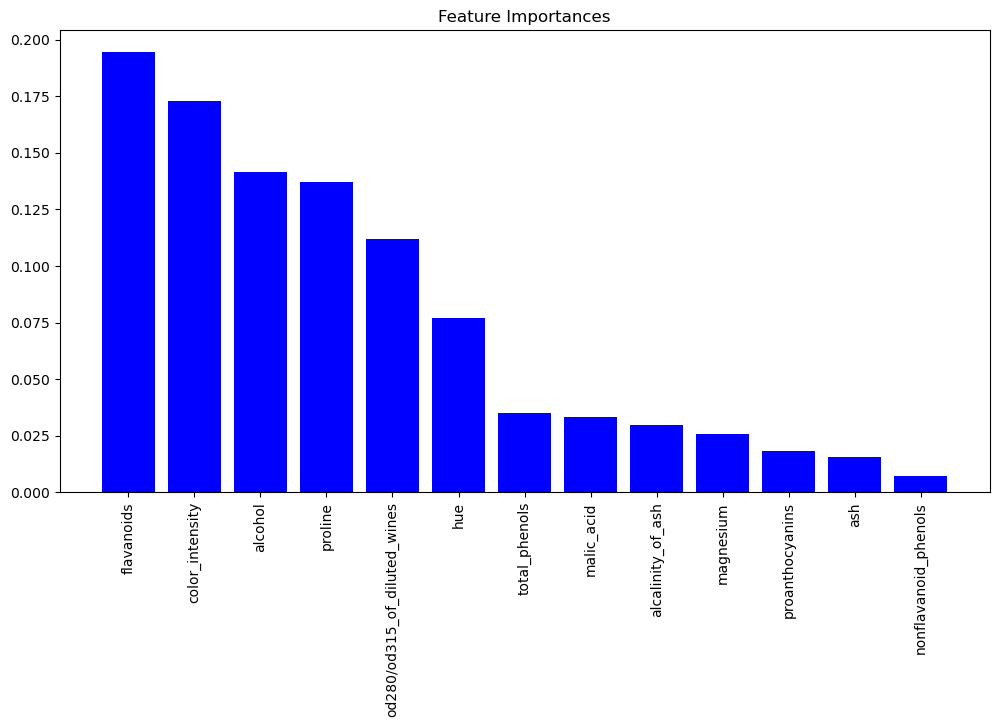

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.datasets import load_wine

# 加载数据
wine = load_wine()

# 转换为DataFrame格式，方便进行数据处理
df_wine = pd.DataFrame(wine.data, columns=wine.feature_names)
df_wine['target'] = wine.target

# 划分特征和标签
X = df_wine.drop('target', axis=1)
y = df_wine['target']

# 训练随机森林模型
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
scores = cross_val_score(rfc, X, y, cv=5)

# 输出交叉验证准确率
print("交叉验证准确率：", scores.mean())

# 绘制混淆矩阵图
rfc.fit(X, y)
plot_confusion_matrix(rfc, X, y, cmap=plt.cm.Blues)
plt.show()

# 绘制特征重要性图
feature_importances = rfc.feature_importances_
feature_names = wine.feature_names
indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(len(feature_importances)), feature_importances[indices], color="b")
plt.xticks(range(len(feature_importances)), [feature_names[i] for i in indices], rotation=90)
plt.show()



LinearSVC模型的交叉验证准确率为： 0.5
SVC模型的交叉验证准确率为： 0.55


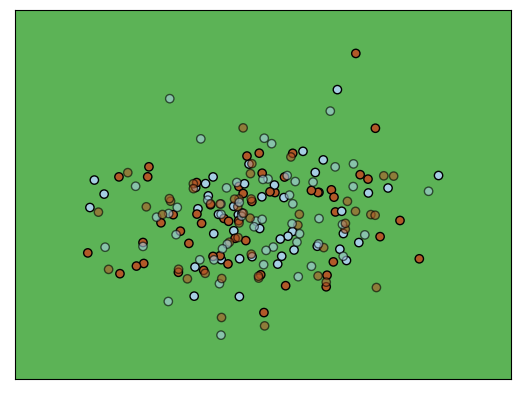

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler


# 生成数据
X, y = make_classification(n_samples=200, n_features=13, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1, scale=100)

# 标准化数据
scaler = StandardScaler()
X[:, :2] = scaler.fit_transform(X[:, :2])

# 划分训练集和测试集
idx = range(len(X))
idx_train, idx_test = idx[:100], idx[100:]
X_train, y_train = X[idx_train], y[idx_train]
X_test, y_test = X[idx_test], y[idx_test]

# 训练LinearSVC和SVC
clf_linear = LinearSVC(max_iter=10000)
scores_linear = cross_val_score(clf_linear, X_train[:, :2], y_train, cv=5)
print("LinearSVC模型的交叉验证准确率为：", np.mean(scores_linear))

clf = SVC(kernel='rbf', gamma='auto')
scores = cross_val_score(clf, X_train[:, :2], y_train, cv=5)
print("SVC模型的交叉验证准确率为：", np.mean(scores))

# 在网格点上进行预测并绘制分类边界
h = 0.2
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Xgrid = np.c_[xx.ravel(), yy.ravel()]
Xgrid[:, :2] = scaler.transform(Xgrid[:, :2])

clf.fit(X_train[:, :2], y_train)
Z = clf.predict(Xgrid)

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

# 绘制训练集和测试集散点图
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolors='k')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Paired, edgecolors='k', alpha=0.6)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.show()


In [31]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score

# 加载数据集
cancer = load_breast_cancer()

# 数据集划分
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

# 特征缩放
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 线性SVM模型
clf_linear = LinearSVC()
clf_linear.fit(X_train_scaled, y_train)

# 非线性SVM模型
clf_rbf = SVC()
clf_rbf.fit(X_train_scaled, y_train)

# 预测并计算准确率
y_pred_linear = clf_linear.predict(X_test_scaled)
acc_linear = accuracy_score(y_test, y_pred_linear)
print("LinearSVC模型的准确率为：", acc_linear)

y_pred_rbf = clf_rbf.predict(X_test_scaled)
acc_rbf = accuracy_score(y_test, y_pred_rbf)
print("SVC模型的准确率为：", acc_rbf)


LinearSVC模型的准确率为： 0.9440559440559441
SVC模型的准确率为： 0.965034965034965


In [34]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# 加载红酒数据集
wine = datasets.load_wine()
X = wine.data
y = wine.target

# 数据标准化
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

# 定义SVM分类器
svc = SVC()

# 定义待调参数
params = {
    'C': [0.1, 1, 10, 100], 
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto'] + [i*0.1 for i in range(1, 10)]
}

# 使用GridSearchCV进行交叉验证调参
clf = GridSearchCV(svc, params, cv=5)
clf.fit(X_train, y_train)

# 输出最佳参数
print("Best parameters: ", clf.best_params_)

# 使用最佳参数进行预测
y_pred = clf.predict(X_test)

# 输出测试集准确率
print("Accuracy on test set: ", clf.score(X_test, y_test))


Best parameters:  {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'sigmoid'}
Accuracy on test set:  0.9722222222222222
